In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
newdf= pd.read_csv('Titanic.csv')

newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
newdf.shape[0]  

418

In [5]:
newdf.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
newdf.loc[:,'PassengerId']

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [7]:
newdf.sort_values(by="PassengerId", ascending=True)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
newdf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
newdf.set_index('PassengerId', inplace=True)
newdf

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [11]:
print(newdf.index)
newdf

Index([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,
       ...
       1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309],
      dtype='int64', name='PassengerId', length=418)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [12]:
newdf.isnull().sum()


Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [13]:
newdf['Cabin'].fillna('Unknown', inplace=True)
newdf['Age'].fillna(newdf['Age'].median(), inplace=True)


C:\Users\ACER\AppData\Local\Temp\ipykernel_24624\1544554436.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  newdf['Cabin'].fillna('Unknown', inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_24624\1544554436.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [14]:
newdf.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Cabin       0
Embarked    0
dtype: int64

In [15]:
newdf.dropna(subset=['Age'], inplace=True)
newdf

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,Q
893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,Unknown,S
894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Unknown,Q
895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,Unknown,S
896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,Unknown,S
1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S


In [16]:
newdf.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        1
Cabin       0
Embarked    0
dtype: int64

In [17]:
newdf.count()

Survived    418
Pclass      418
Name        418
Sex         418
Age         418
SibSp       418
Parch       418
Ticket      418
Fare        417
Cabin       418
Embarked    418
dtype: int64

In [18]:
newdf.drop('Name',axis=1,inplace=True)

In [19]:
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
import seaborn as sns


ModuleNotFoundError: No module named 'seaborn'

C:\Users\ACER\AppData\Local\Temp\ipykernel_85888\932521560.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=newdf,palette='Set1')


<Axes: xlabel='Survived', ylabel='count'>

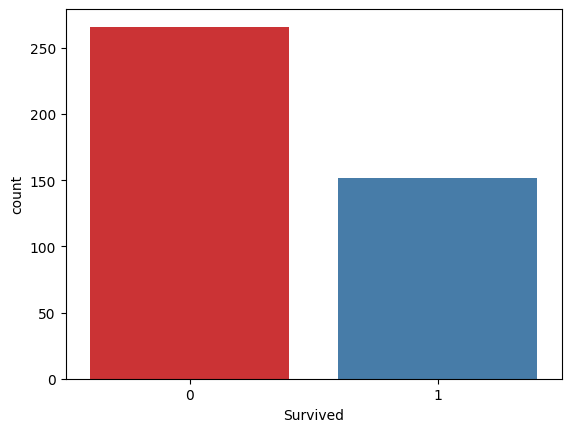

In [ ]:
sns.countplot(x='Survived',data=newdf,palette='Set1')

<Axes: xlabel='Age', ylabel='Count'>

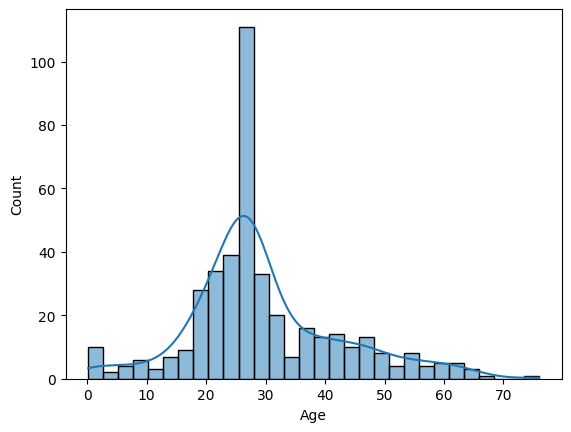

In [ ]:
sns.histplot(newdf['Age'], bins=30, edgecolor='black', kde=True)



C:\Users\ACER\AppData\Local\Temp\ipykernel_85888\614329975.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=newdf,palette='Set1')


<Axes: xlabel='Pclass', ylabel='Age'>

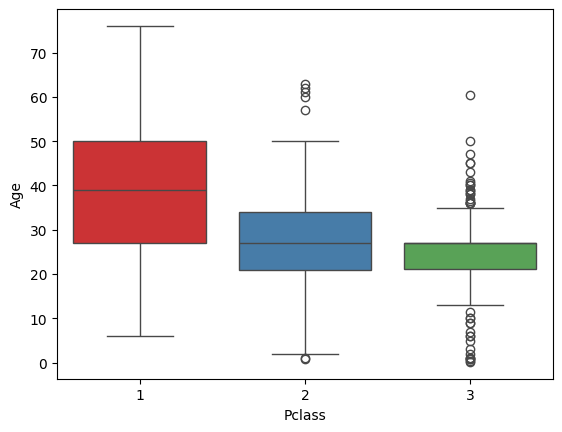

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=newdf,palette='Set1')

In [ ]:
newdf['Pclass'].isnull()

PassengerId
892     False
893     False
894     False
895     False
896     False
        ...  
1305    False
1306    False
1307    False
1308    False
1309    False
Name: Pclass, Length: 418, dtype: bool

<Axes: xlabel='Sex', ylabel='Survived'>

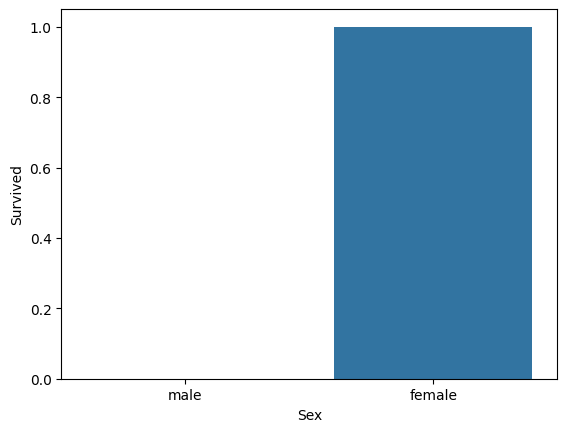

In [ ]:
pd.crosstab(newdf['Sex'], newdf['Survived'], normalize='index')
sns.barplot(data=newdf, x='Sex', y='Survived')

In [ ]:
newdf.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1305,0,3,male,27.0,0,0,A.5. 3236,8.0500,Unknown,S
1306,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S
1308,0,3,male,27.0,0,0,359309,8.0500,Unknown,S
1309,0,3,male,27.0,1,1,2668,22.3583,Unknown,C


<Axes: xlabel='Fare', ylabel='Count'>

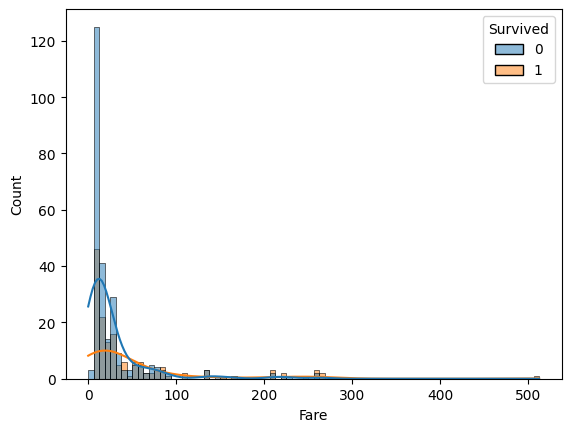

In [ ]:
sns.histplot(x='Fare',hue='Survived',data=newdf,kde=True)

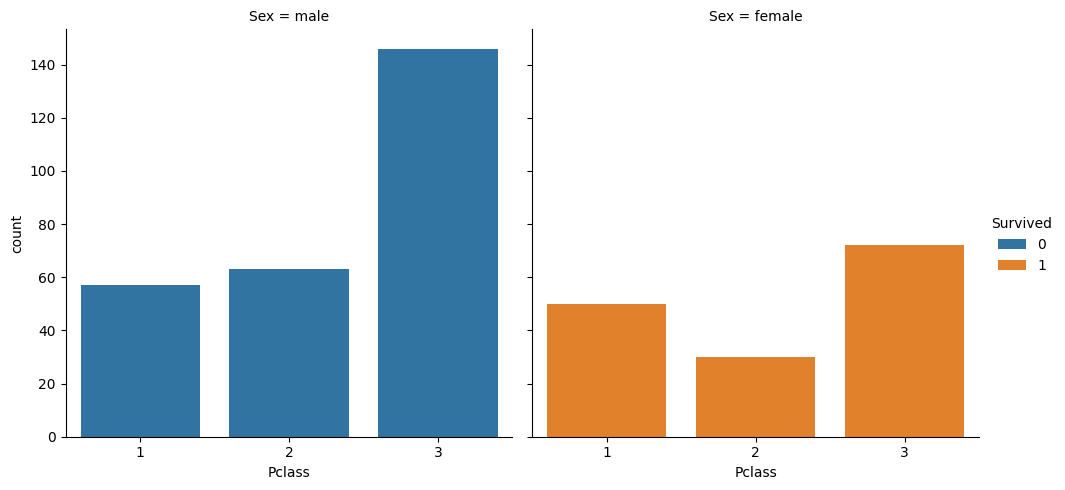

In [ ]:
sns.catplot(data=newdf,x='Pclass',hue='Survived',col='Sex',kind='count')

<Axes: xlabel='Age', ylabel='Count'>

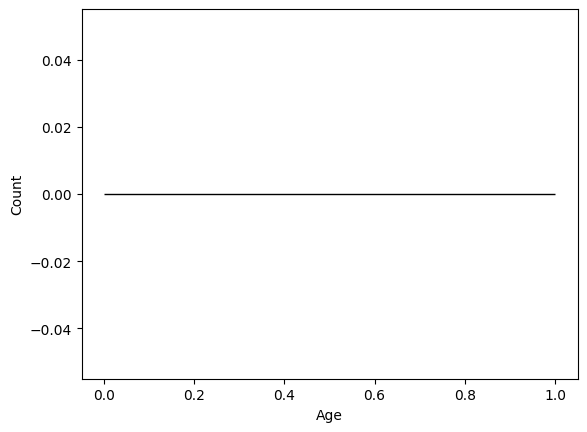

In [ ]:
male_survivors= newdf[(newdf['Sex']=='male') & (newdf['Survived']==1)]
sns.histplot(data=male_survivors, x='Age',kde=True)

In [ ]:
newdf['Sex'].map({'male': 0, 'female': 1})


PassengerId
892     0
893     1
894     0
895     0
896     1
       ..
1305    0
1306    1
1307    0
1308    0
1309    0
Name: Sex, Length: 418, dtype: int64

In [ ]:
newdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,0,3,male,34.5,0,0,330911,7.8292,Unknown,Q
893,1,3,female,47.0,1,0,363272,7.0000,Unknown,S
894,0,2,male,62.0,0,0,240276,9.6875,Unknown,Q
895,0,3,male,27.0,0,0,315154,8.6625,Unknown,S
896,1,3,female,22.0,1,1,3101298,12.2875,Unknown,S
...,...,...,...,...,...,...,...,...,...,...
1305,0,3,male,27.0,0,0,A.5. 3236,8.0500,Unknown,S
1306,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C
1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,Unknown,S


In [ ]:
newdf['Deck'] = newdf['Cabin'].str[0]
newdf.drop('Cabin', axis=1, inplace=True)



In [ ]:
newdf

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Deck
PassengerId,,,,,,,,,,
892,0,3,male,34.5,0,0,330911,7.8292,Q,U
893,1,3,female,47.0,1,0,363272,7.0000,S,U
894,0,2,male,62.0,0,0,240276,9.6875,Q,U
895,0,3,male,27.0,0,0,315154,8.6625,S,U
896,1,3,female,22.0,1,1,3101298,12.2875,S,U
...,...,...,...,...,...,...,...,...,...,...
1305,0,3,male,27.0,0,0,A.5. 3236,8.0500,S,U
1306,1,1,female,39.0,0,0,PC 17758,108.9000,C,C
1307,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,U


In [ ]:


le = LabelEncoder()
newdf['Embarked'] = le.fit_transform(newdf['Embarked'])
newdf['Sex'] = le.fit_transform(newdf['Sex'])
newdf['Deck'] = le.fit_transform(newdf['Deck'])


In [ ]:
newdf.drop('Ticket',axis=1, inplace=True)

In [ ]:
newdf.isnull().sum()
newdf['Fare'].fillna(newdf['Fare'].median(), inplace=True)
newdf

C:\Users\ACER\AppData\Local\Temp\ipykernel_85888\970238437.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  newdf['Fare'].fillna(newdf['Fare'].median(), inplace=True)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
PassengerId,,,,,,,,,
892,0,3,1,34.5,0,0,7.8292,1,7
893,1,3,0,47.0,1,0,7.0000,2,7
894,0,2,1,62.0,0,0,9.6875,1,7
895,0,3,1,27.0,0,0,8.6625,2,7
896,1,3,0,22.0,1,1,12.2875,2,7
...,...,...,...,...,...,...,...,...,...
1305,0,3,1,27.0,0,0,8.0500,2,7
1306,1,1,0,39.0,0,0,108.9000,0,2
1307,0,3,1,38.5,0,0,7.2500,2,7


In [ ]:
X=newdf.drop('Survived',axis=1)
y=newdf['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model=LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [ ]:
y_pred=model.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
confusionmatrix= confusion_matrix(y_test,y_pred)
classficationresult = classification_report(y_test,y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusionmatrix)  
print("classrifcation report:")
print(classficationresult)

Accuracy: 1.0
Confusion Matrix:
[[53  0]
 [ 0 31]]
classrifcation report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [ ]:
from sklearn.model_selection import cross_val_score
# Perform 5-fold cross-validation on the whole dataset
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0


In [ ]:
newdf.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
PassengerId,,,,,,,,,
892,0,3,1,34.5,0,0,7.8292,1,7


In [ ]:
new_passenger = [[1, 0, 35, 0, 0, 1, 1, 7]]  # replace with actual feature values

# Predict survival (0 = not survived, 1 = survived)
prediction = model.predict(new_passenger)

if prediction[0] == 1:
    print("Passenger survived")
else:
    print("Passenger did not survive")

Passenger survived


c:\Users\ACER\OneDrive\Documents\Desktop\AI-ML\GOAT\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
